# Trying Actual Math Formulas

I need help with and am having issues reshaping the images or getting them into the form to where I can run them through my CNN.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import itertools

tf.random.set_seed(1)

In [2]:
# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('/Users/morganallen/research_projects/formula_images_processed'):
    # load image
    img_data = image.imread('/Users/morganallen/research_projects/formula_images_processed/' + filename)
    # store loaded image
    loaded_images.append(img_data)

In [9]:
loaded_images[0].shape

(128, 512, 3)

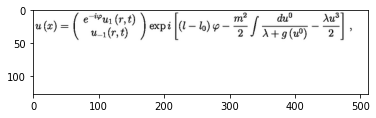

In [28]:
plt.imshow(loaded_images[0])
plt.show()

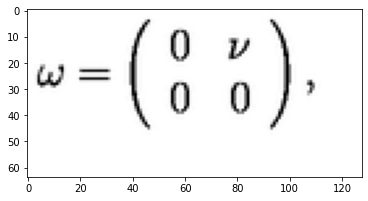

In [3]:
plt.imshow(loaded_images[1])
plt.show()

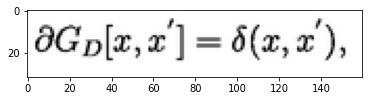

In [4]:
plt.imshow(loaded_images[2])
plt.show()

In [17]:
1-loaded_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [18]:
from tensorflow.image import ResizeMethod

image = tf.image.resize_with_pad(
    1-loaded_images[0], 100, 100, method=ResizeMethod.BILINEAR,
    antialias=False
)

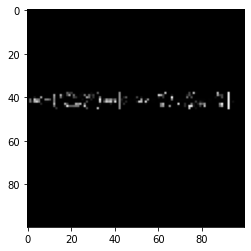

In [19]:
plt.imshow(image)

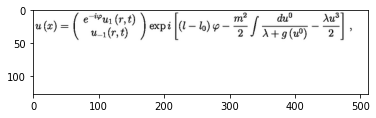

In [20]:
plt.imshow(loaded_images[0])

In [19]:
X_train_img = tf.image.resize(loaded_images, (45,45))

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [25]:
for i in loaded_images:
    images = pd.concat(images, loaded_images[i])

TypeError: only integer scalar arrays can be converted to a scalar index

In [14]:
len(loaded_images)

103536

In [26]:
images = np.array(loaded_images)
images.shape

(103536,)

In [20]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train):
  cnn_model = build_cnn(conv_layers, pool_layers)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  confusionmatrix(model= cnn_model)

  return history

In [21]:
def build_cnn(conv_layers, pool_layers):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(30, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.4))
    x=15
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
          model_cnn.add(Conv2D(x, kernel_size=3,activation='relu',padding='same'))
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
          model_cnn.add(Dropout(0.4))
          x=x*2
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(50, activation='relu'))
    model_cnn.add(Dense(47, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

In [22]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

In [23]:
def confusionmatrix(model):

  confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

  confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

  classes=[0,1,2,3,4,5,6,7,8,9]

  plt.figure(figsize=(14,14))
  plt.imshow(confusion_norm, interpolation='nearest') 
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  fmt = '.3f'
  thresh = confusion_norm.max() / 2.
  for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
    plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
    color="black" if confusion_norm[i, j] > thresh else "white")
  plt.tight_layout()

In [ ]:
build_model(conv_layers=2, pool_layers=2, epochs=30, X_train=X_train, y_train=y_train)